In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
start='2012-01-01'
end='2023-11-15'

stock='GOOG'

df=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.reset_index(inplace=True)

In [5]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449757,16.517494,16.127391,16.141484,147611217
1,2012-01-04,16.520702,16.569404,16.331338,16.440359,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...,...
2982,2023-11-08,132.267975,132.545889,131.176173,131.374681,15093600
2983,2023-11-09,130.709671,132.962777,130.531003,132.367237,17976500
2984,2023-11-10,133.062012,133.270455,129.895757,130.550847,20872900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2987 non-null   datetime64[ns]
 1   (Close, GOOG)   2987 non-null   float64       
 2   (High, GOOG)    2987 non-null   float64       
 3   (Low, GOOG)     2987 non-null   float64       
 4   (Open, GOOG)    2987 non-null   float64       
 5   (Volume, GOOG)  2987 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 140.1 KB


In [7]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
count,2987,2987.000000,2987.000000,2987.000000,2987.000000,2.987000e+03
mean,2017-12-09 06:04:27.559424256,59.483715,60.078611,58.862139,59.451629,4.404821e+07
min,2012-01-03 00:00:00,13.820403,13.955629,13.757858,13.852295,1.584340e+05
25%,2014-12-20 12:00:00,27.811431,28.112844,27.640949,27.886461,2.427100e+07
50%,2017-12-07 00:00:00,50.690311,51.327042,50.144905,50.641680,3.185800e+07
75%,2020-11-24 12:00:00,86.366486,87.553835,85.630506,86.276912,5.132352e+07
max,2023-11-14 00:00:00,149.587067,150.967720,148.771678,150.732970,4.995615e+08
std,NaN,37.965886,38.405132,37.524798,37.940879,3.517537e+07


In [8]:
df.shape

(2987, 6)

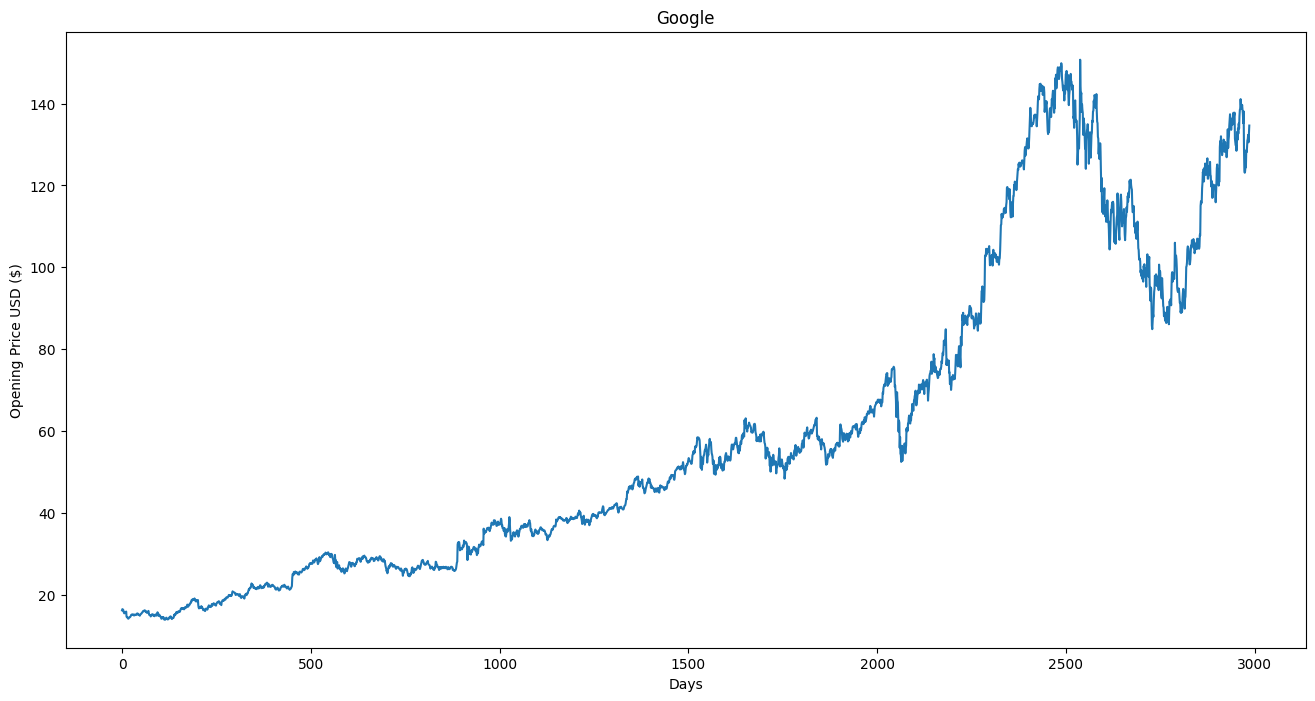

In [9]:
#EDA

# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

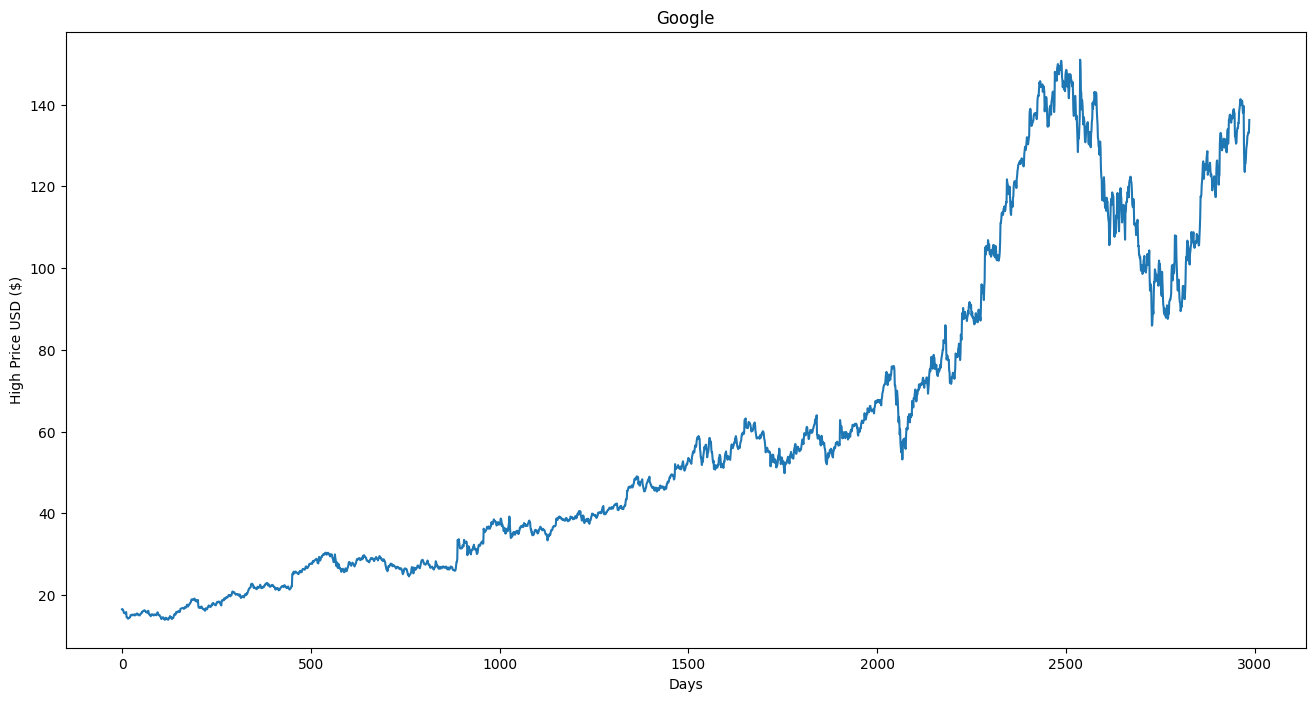

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

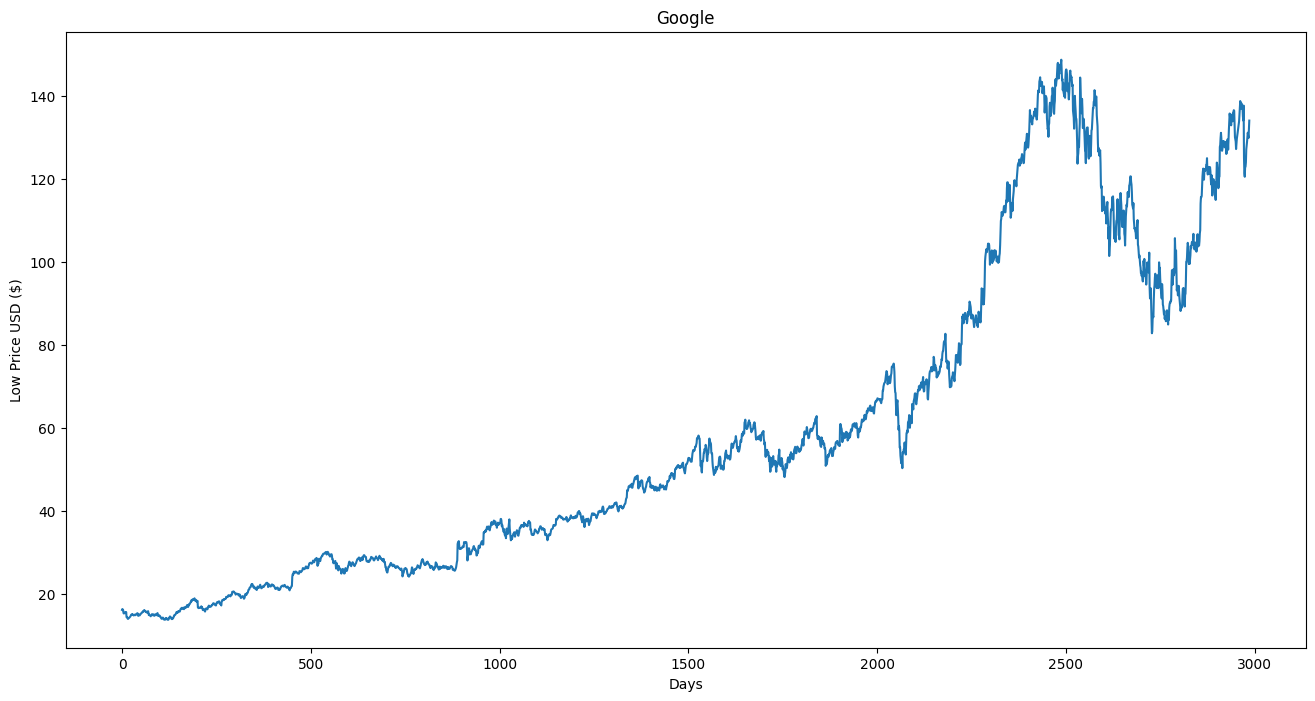

In [11]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

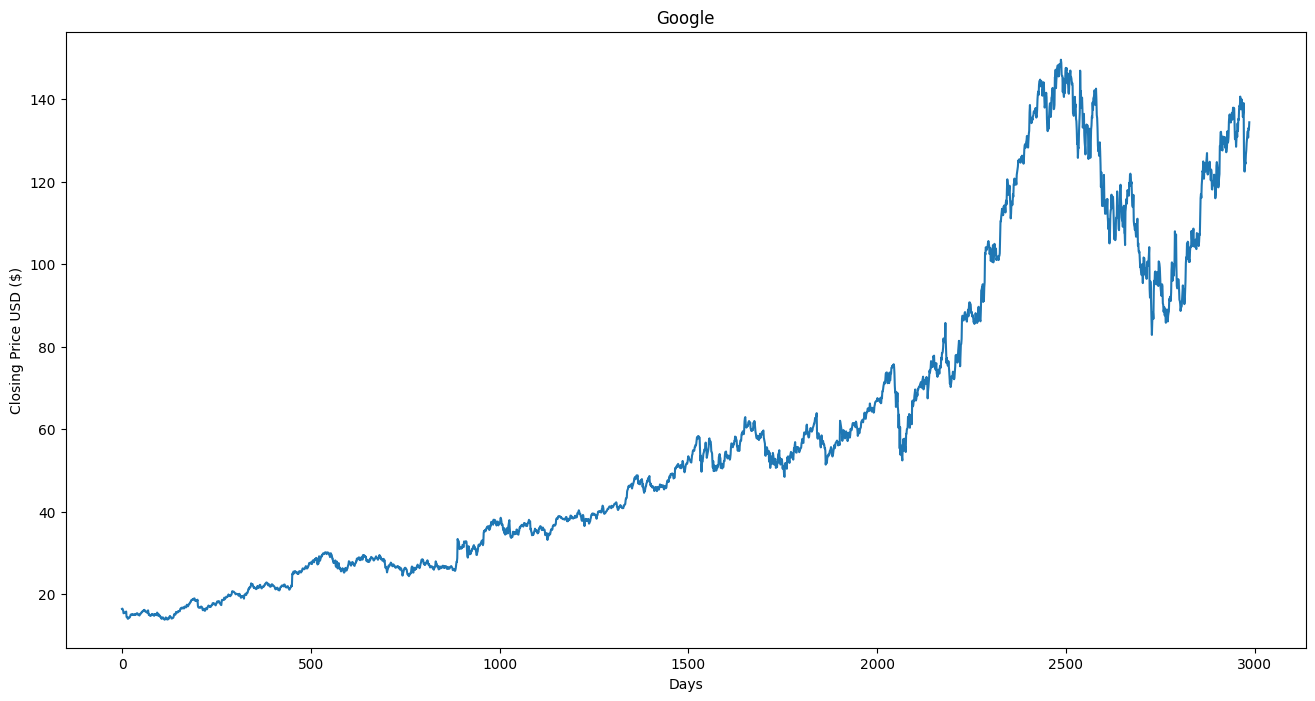

In [12]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [13]:
df2 = df['Close']

In [14]:
df2.tail()

Ticker,GOOG
2982,132.267975
2983,130.709671
2984,133.062012
2985,132.645126
2986,134.421814


In [15]:
df2 = pd.DataFrame(df2)

In [16]:
df2.tail()

Ticker,GOOG
2982,132.267975
2983,130.709671
2984,133.062012
2985,132.645126
2986,134.421814


In [17]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2.iloc[:, 0].shift(-future_days)

In [18]:
df2.tail()

Ticker,GOOG,Prediction
2982,132.267975,NaN
2983,130.709671,NaN
2984,133.062012,NaN
2985,132.645126,NaN
2986,134.421814,NaN


In [19]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 16.44975662]
 [ 16.52070236]
 [ 16.29153633]
 ...
 [120.3572998 ]
 [122.94786835]
 [122.10418701]]


In [20]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 14.62335014  14.69281578  14.54176998 ... 133.06201172 132.64512634
 134.42181396]


In [21]:
#LINEAR AND DECISION TREE REGRESSION

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import joblib

In [23]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [24]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 99.12653351],
       [100.67492676],
       [107.99006653],
       [104.43669891],
       [102.69973755],
       [107.23571014],
       [ 99.25556183],
       [ 94.74935913],
       [ 94.15382385],
       [ 94.29278564],
       [ 94.24315643],
       [ 96.37714386],
       [ 95.06698608],
       [ 93.88584137],
       [ 91.36474609],
       [ 91.11660767],
       [ 90.39204407],
       [ 88.68484497],
       [ 89.42926025],
       [ 89.6277771 ],
       [ 89.83621979],
       [ 91.62280273],
       [ 93.32006836],
       [ 94.86847687],
       [ 93.46897888],
       [ 93.94539642],
       [ 91.97020721],
       [ 90.33249664],
       [ 90.9776535 ],
       [ 93.54837799],
       [ 95.83126068],
       [100.31760406],
       [101.69725037],
       [101.17119598],
       [105.05208588],
       [103.44415283],
       [105.46897125],
       [105.27044678],
       [102.29278564],
       [100.60544586],
       [101.14142609],
       [100.56574249],
       [103.22579193],
       [104

In [25]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[118.20345306 118.12406158 120.17864227 127.40444183 125.87542725
 119.6625061  121.71710205 120.02976227 119.24563599 115.99998474
 116.8337326   90.33249664 123.90071869 124.76424408 124.12901306
 123.15631104 121.86598969 118.64017487 119.41436768 120.97268677
 121.87591553 128.69477844 128.90319824 132.01982117 132.11909485
 130.90817261 127.68235016 127.81139374 127.58310699 132.11909485
 114.54092407 129.18112183 135.77815247 129.20097351 100.63522339
 129.30021667 128.14886475 129.48881531 135.01585388 127.97021484
 128.72453308 132.21832275 129.44909668 129.71710205 130.80891418
 134.48136902 135.91064453 136.32754517 132.13397217 127.40444183
 134.36224365 135.18606567 136.17861938 130.80891418 131.09924316
 136.47642517 137.95532227 137.27044678 137.92555237 137.79649353
 133.58805847  94.60047913 130.27293396 131.18609619 132.13397217
 130.48136902 132.13893127 130.86845398 134.16374207 132.30769348
  91.91065979 134.97766113  91.91065979 142.75134277 138.16374207
 140.64514

In [26]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[102.61232434 104.14276723 111.37310339 107.86092958 106.14410461
 110.62749217 102.73985685  98.28589407  97.69726277  97.83461359
  97.78555972  99.89480807  98.59983881  97.43238697  94.94051848
  94.6952567   93.97909288  92.29168516  93.02747052  93.22368598
  93.42971221  95.1955835   96.87317291  98.40363089  97.02035713
  97.49125161  95.53896056  93.92023579  94.55791341  97.09883577
  99.35525325 103.78958694 105.15323916 104.63328327 108.46918242
 106.87988997 108.88123489 108.68501189 105.74187046 104.07409182
 104.60385849 104.03484873 106.66406051 107.55681823 107.76283693
 107.59604624 111.47119604 109.55815561 108.74389161 107.86092958
 110.77465377 112.0205767  109.03819972 107.76283693 107.66472166
 108.52803952 108.53787292 109.39138001 107.26249504 107.10553021
 110.95124769 110.80408609 110.30375174 108.60654079 108.74389161
 107.8511188  108.83708264 110.82370009 110.52939198 114.7871393
 119.31958827 120.32025696 119.37846045 122.44913439 123.8127866
 125.8141315

In [27]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\ab775\AppData\Local\Temp\ipykernel_17916\1911164318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


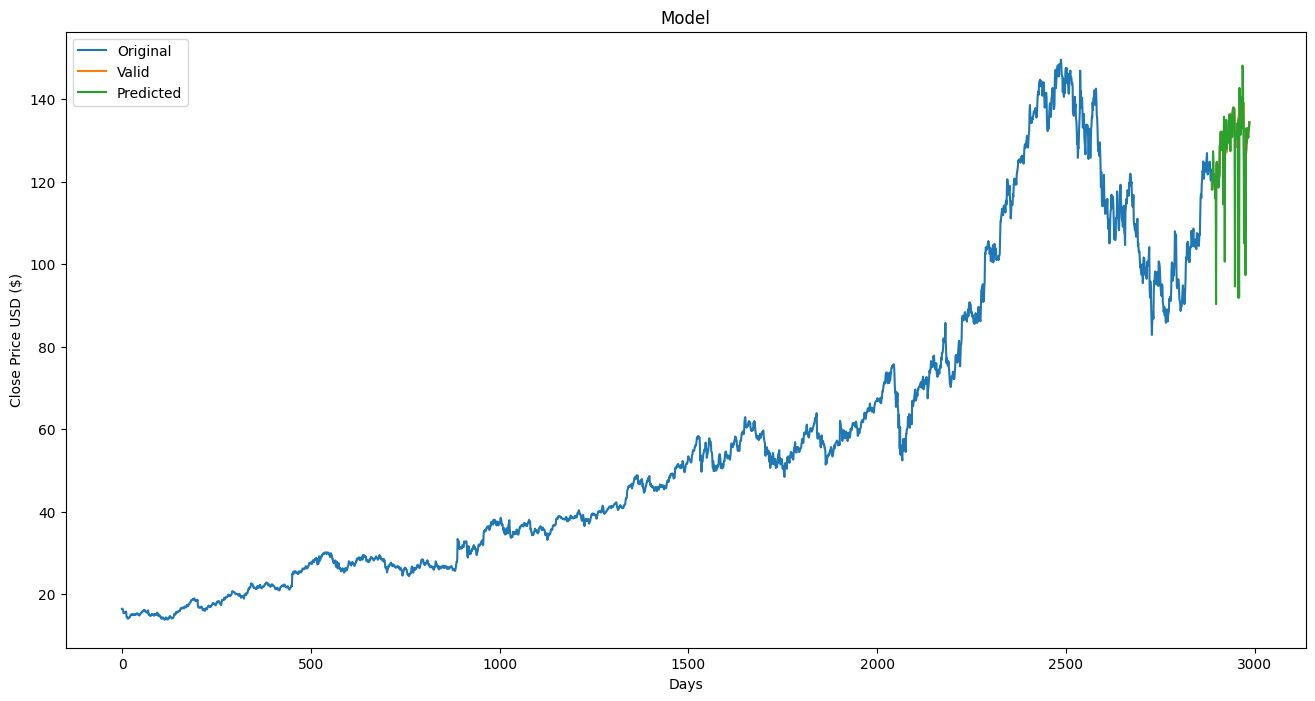

In [28]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2.iloc[:, 0])
plt.plot(valid.iloc[:, 0])
plt.plot(valid['Predictions'])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [29]:
joblib.dump(tree, 'decision_tree_model.joblib')

['decision_tree_model.joblib']